In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [26]:
train_img, test_img = train_img / 255.0, test_img / 255.0

In [27]:
num_classes = 10
train_lab = to_categorical(train_lab, num_classes)
test_lab = to_categorical(test_lab, num_classes)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [28]:
momentum_values_sgd = [0.0, 0.5, 0.9]
momentum_values_rmsprop = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]

In [29]:
sgd_history_list = []
adam_history_list = []
rmsprop_history_list = []

In [ ]:
for momentum_val in momentum_values_sgd:
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    sgd_model = create_cnn_model()
    sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    sgd_history = sgd_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))
    sgd_history_list.append(sgd_history)

for momentum_val in momentum_values_rmsprop:
    rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=momentum_val)
    rmsprop_model = create_cnn_model()
    rmsprop_model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    rmsprop_history = rmsprop_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))
    rmsprop_history_list.append(rmsprop_history)

for beta1_val in beta1_values_adam:
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    adam_model = create_cnn_model()
    adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    adam_history = adam_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))
    adam_history_list.append(adam_history)

Epoch 1/8
782/782 [==============================] - 78s 98ms/step - loss: 2.1410 - accuracy: 0.2056 - val_loss: 2.1974 - val_accuracy: 0.2138
Epoch 2/8
782/782 [==============================] - 78s 99ms/step - loss: 1.8711 - accuracy: 0.3234 - val_loss: 1.7642 - val_accuracy: 0.3664
Epoch 3/8
782/782 [==============================] - 75s 96ms/step - loss: 1.6715 - accuracy: 0.3965 - val_loss: 1.6636 - val_accuracy: 0.4006
Epoch 4/8
782/782 [==============================] - 75s 95ms/step - loss: 1.5440 - accuracy: 0.4440 - val_loss: 1.5754 - val_accuracy: 0.4186
Epoch 5/8
782/782 [==============================] - 76s 97ms/step - loss: 1.4573 - accuracy: 0.4775 - val_loss: 1.4535 - val_accuracy: 0.4679
Epoch 6/8
782/782 [==============================] - 76s 97ms/step - loss: 1.3848 - accuracy: 0.5045 - val_loss: 1.4128 - val_accuracy: 0.4916
Epoch 7/8
782/782 [==============================] - 76s 97ms/step - loss: 1.3230 - accuracy: 0.5283 - val_loss: 1.3135 - val_accuracy: 0.5366

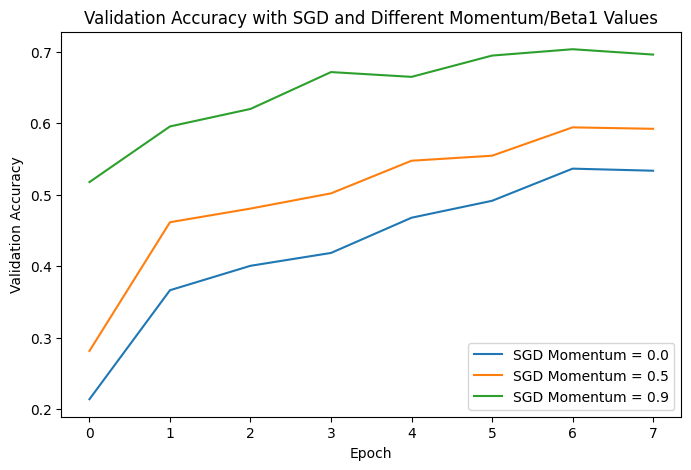

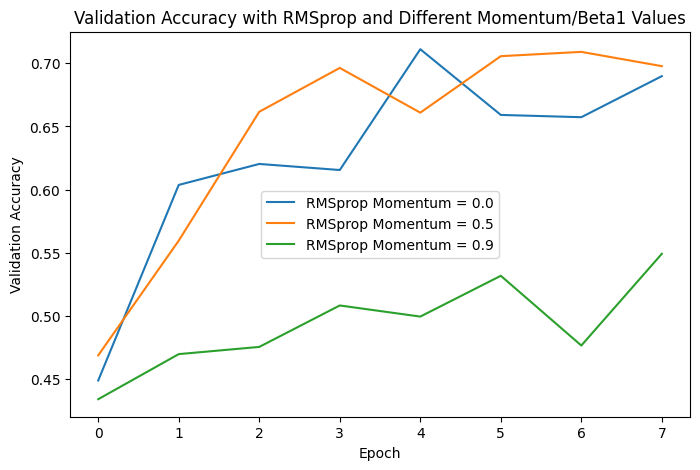

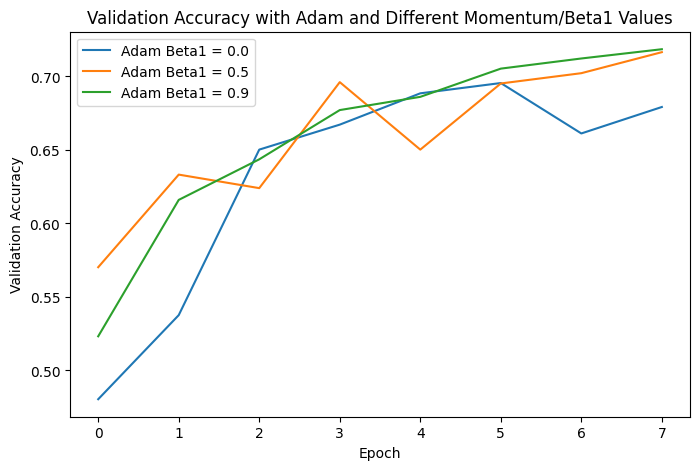

In [ ]:
def plot_accuracy(history_list, momentum_values, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Momentum = {momentum_values[i]}' if optimizer_name == 'SGD' or optimizer_name == 'RMSprop' else f'{optimizer_name} Beta1 = {momentum_values[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy with {optimizer_name} and Different Momentum')
    plt.legend()
    plt.show()

plot_accuracy(sgd_history_list, momentum_values_sgd, 'SGD')
plot_accuracy(rmsprop_history_list, momentum_values_rmsprop, 'RMSprop')
plot_accuracy(adam_history_list, beta1_values_adam, 'Adam')

In [30]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [31]:
train_img, test_img = train_img / 255.0, test_img / 255.0

In [32]:
num_classes = 10
train_lab = to_categorical(train_lab, num_classes)
test_lab = to_categorical(test_lab, num_classes)
def create_cnn_model(regularizer=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [33]:
l2_strength = 0.001

In [34]:
sgd_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
adam_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
rmsprop_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))

In [35]:
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
sgd_history = sgd_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))
adam_history = adam_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))
rmsprop_history = rmsprop_model.fit(train_img, train_lab, epochs=8, batch_size=64, validation_data=(test_img, test_lab))

Epoch 1/8
782/782 [==============================] - 51s 64ms/step - loss: 2.2717 - accuracy: 0.2088 - val_loss: 2.1694 - val_accuracy: 0.2578
Epoch 2/8
782/782 [==============================] - 49s 63ms/step - loss: 2.0107 - accuracy: 0.3233 - val_loss: 1.9221 - val_accuracy: 0.3481
Epoch 3/8
782/782 [==============================] - 49s 63ms/step - loss: 1.8253 - accuracy: 0.3939 - val_loss: 1.7582 - val_accuracy: 0.4074
Epoch 4/8
782/782 [==============================] - 49s 63ms/step - loss: 1.6865 - accuracy: 0.4421 - val_loss: 1.7694 - val_accuracy: 0.4124
Epoch 5/8
782/782 [==============================] - 52s 66ms/step - loss: 1.5936 - accuracy: 0.4752 - val_loss: 1.6358 - val_accuracy: 0.4647
Epoch 6/8
782/782 [==============================] - 49s 63ms/step - loss: 1.5201 - accuracy: 0.5055 - val_loss: 1.4834 - val_accuracy: 0.5127
Epoch 7/8
782/782 [==============================] - 49s 63ms/step - loss: 1.4608 - accuracy: 0.5267 - val_loss: 1.5738 - val_accuracy: 0.4923

In [ ]:
def evaluate_model(model, test_img, test_lab):
    loss, accuracy = model.evaluate(test_img, test_lab)
    print("Test accuracy:", accuracy)

print("SGD Optimizer:")
evaluate_model(sgd_model, test_img, test_lab)

print("Adam Optimizer:")
evaluate_model(adam_model, test_img, test_lab)

print("RMSprop Optimizer:")
evaluate_model(rmsprop_model, test_img, test_lab)

SGD Optimizer:
313/313 [==============================] - 5s 14ms/step - loss: 2.4418 - accuracy: 0.0990
Test accuracy: 0.0989999994635582
Adam Optimizer:
313/313 [==============================] - 5s 16ms/step - loss: 2.4420 - accuracy: 0.1003
Test accuracy: 0.10029999911785126
RMSprop Optimizer:
313/313 [==============================] - 5s 14ms/step - loss: 2.4364 - accuracy: 0.1143
Test accuracy: 0.11429999768733978


In [36]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [37]:
num_classes = 10
train_labels_preprocessed = to_categorical(train_lab, num_classes)
test_labels_preprocessed = to_categorical(test_lab, num_classes)

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [38]:
train_images_preprocessed, test_images_preprocessed = train_img / 255.0, test_img / 255.0


In [39]:
train_images_no_preprocessing, test_images_no_preprocessing = train_img, test_img
train_labels_no_preprocessing = tf.squeeze(train_lab)
test_labels_no_preprocessing = tf.squeeze(test_lab)

In [40]:
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
model_preprocessing = create_cnn_model()
model_preprocessing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_no_preprocessing = model_no_preprocessing.fit(train_images_no_preprocessing, train_labels_no_preprocessing, epochs=8, batch_size=64, validation_data=(test_images_no_preprocessing, test_labels_no_preprocessing))
history_preprocessing = model_preprocessing.fit(train_images_preprocessed, train_labels_preprocessed, epochs=8, batch_size=64, validation_data=(test_images_preprocessed, test_labels_preprocessed))

Epoch 1/8
782/782 [==============================] - 82s 102ms/step - loss: 1.9750 - accuracy: 0.4086 - val_loss: 1.3978 - val_accuracy: 0.5009
Epoch 2/8
782/782 [==============================] - 77s 99ms/step - loss: 1.2618 - accuracy: 0.5525 - val_loss: 1.1572 - val_accuracy: 0.5835
Epoch 3/8
782/782 [==============================] - 77s 99ms/step - loss: 1.1032 - accuracy: 0.6143 - val_loss: 1.0730 - val_accuracy: 0.6235
Epoch 4/8
782/782 [==============================] - 76s 97ms/step - loss: 0.9921 - accuracy: 0.6527 - val_loss: 1.1035 - val_accuracy: 0.6206
Epoch 5/8
782/782 [==============================] - 77s 98ms/step - loss: 0.8974 - accuracy: 0.6864 - val_loss: 1.1216 - val_accuracy: 0.6242
Epoch 6/8
782/782 [==============================] - 74s 95ms/step - loss: 0.8245 - accuracy: 0.7132 - val_loss: 0.9875 - val_accuracy: 0.6666
Epoch 7/8
782/782 [==============================] - 76s 97ms/step - loss: 0.7531 - accuracy: 0.7359 - val_loss: 1.0366 - val_accuracy: 0.662

In [ ]:
def evaluate_model(model, test_img, test_lab):
    loss, accuracy = model.evaluate(test_img, test_lab)
    print("Test accuracy:", accuracy)

print("Without Data Preprocessing:")
evaluate_model(model_no_preprocessing, test_images_no_preprocessing, test_labels_no_preprocessing)

print("With Data Preprocessing:")
evaluate_model(model_preprocessing, test_images_preprocessed, test_labels_preprocessed)

Without Data Preprocessing:
313/313 [==============================] - 5s 16ms/step - loss: 1.0728 - accuracy: 0.6633
Test accuracy: 0.6632999777793884
With Data Preprocessing:
313/313 [==============================] - 6s 18ms/step - loss: 0.8377 - accuracy: 0.7204
Test accuracy: 0.7203999757766724


In [42]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

In [43]:
train_img, test_img = train_img / 255.0, test_img / 255.0

In [44]:
num_classes = 10
train_lab = to_categorical(train_lab, num_classes)
test_lab = to_categorical(test_lab, num_classes)

In [45]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [23]:
optimizers = ['sgd', 'adam', 'rmsprop']
histories = []

for optimizer_name in optimizers:
    model = create_cnn_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_img, train_lab, epochs=10, batch_size=64, validation_data=(test_img, test_lab))
    histories.append(history)

Epoch 1/10
782/782 [==============================] - 54s 69ms/step - loss: 2.1371 - accuracy: 0.2093 - val_loss: 2.0680 - val_accuracy: 0.2480
Epoch 2/10
782/782 [==============================] - 50s 64ms/step - loss: 1.8503 - accuracy: 0.3356 - val_loss: 1.9130 - val_accuracy: 0.3036
Epoch 3/10
782/782 [==============================] - 49s 63ms/step - loss: 1.6440 - accuracy: 0.4092 - val_loss: 1.8634 - val_accuracy: 0.3733
Epoch 4/10
782/782 [==============================] - 50s 64ms/step - loss: 1.5187 - accuracy: 0.4505 - val_loss: 1.5175 - val_accuracy: 0.4446
Epoch 5/10
782/782 [==============================] - 51s 65ms/step - loss: 1.4401 - accuracy: 0.4814 - val_loss: 1.4861 - val_accuracy: 0.4651
Epoch 6/10
782/782 [==============================] - 50s 64ms/step - loss: 1.3715 - accuracy: 0.5103 - val_loss: 1.3760 - val_accuracy: 0.4972
Epoch 7/10
782/782 [==============================] - 50s 64ms/step - loss: 1.3168 - accuracy: 0.5331 - val_loss: 1.4086 - val_accuracy:

In [46]:
def evaluate_model(model, test_img, test_lab):
    loss, accuracy = model.evaluate(test_img, test_lab)
    return accuracy

test_accuracies = []
for i, optimizer_name in enumerate(optimizers):
    test_accuracy = evaluate_model(histories[i].model, test_img, test_lab)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy}")

313/313 [==============================] - 3s 10ms/step - loss: 1.2172 - accuracy: 0.5612
Test accuracy with sgd optimizer: 0.5612000226974487
313/313 [==============================] - 3s 10ms/step - loss: 0.9033 - accuracy: 0.7183
Test accuracy with adam optimizer: 0.7182999849319458
313/313 [==============================] - 3s 10ms/step - loss: 0.9855 - accuracy: 0.7161
Test accuracy with rmsprop optimizer: 0.7160999774932861


In [47]:
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
print(f"\nBest optimizer based on test accuracy: {best_optimizer}")



Best optimizer based on test accuracy: adam


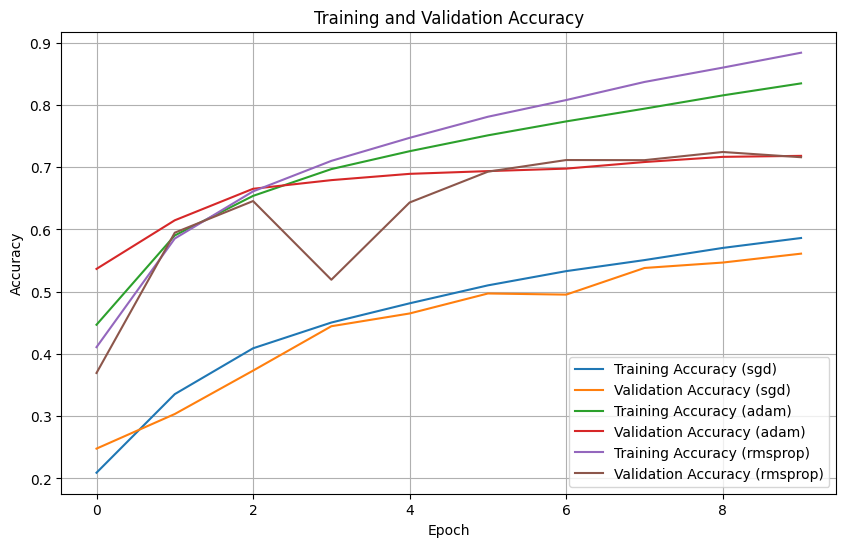

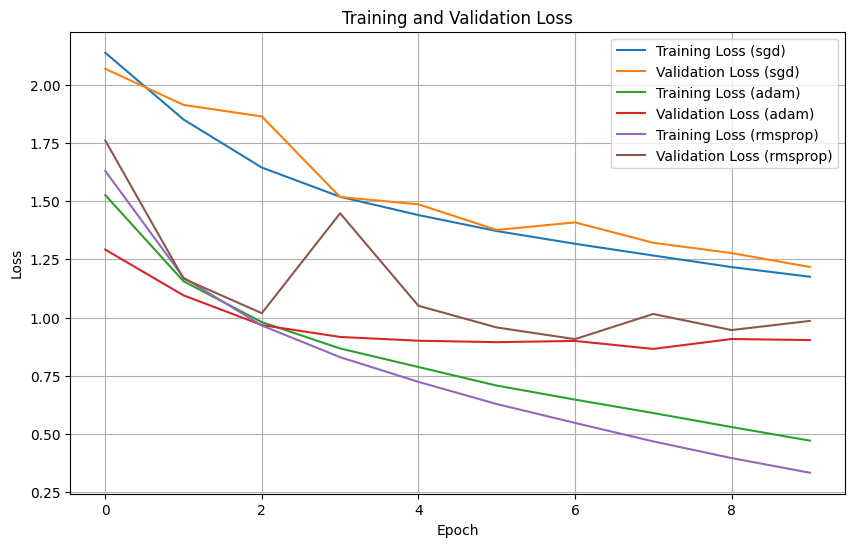

In [48]:
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['loss'], label=f'Training Loss ({optimizer_name})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()